<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#вывод" data-toc-modified-id="вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#вывод" data-toc-modified-id="вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Создание-и-обучение-моделей" data-toc-modified-id="Создание-и-обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание и обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Итог" data-toc-modified-id="Итог-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итог</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [2]:
# Загрузим lightgbm

!pip install lightgbm

In [3]:
# Загрузим pandas profiling

!pip3 install pandas-profiling==2.11

     |████████████████████████████████| 243 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 21.2 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 49.1 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 86.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 59.1 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=da223f8fd359119e5fea7581e613ed95132faa673a1678d69791306806f5d129
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [4]:
# Загрузим необходимые библиотеки и функции 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import time
import re
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [5]:
# отключить некритические предупреждения в коде

warnings.filterwarnings("ignore")

In [6]:
# сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы

pd.set_option('display.max_columns', None)

In [7]:
# загрузим файл, сразу сделав datatime идексами и ресемплируем
try:
    data = pd.read_csv('C:\\Users\\magas\\Desktop\\Проекты\\taxi.csv', index_col=[0], parse_dates=[0]).resample('1H').sum()
except:
    data = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0]).resample('1H').sum()

### вывод

Как видим, пропусков нет.  Нулевые значения убирать не будем, т.к. это может означать, что такси не вызывали (такое вполне реалистично). Потому предобработка не требуется. Проанализируем данные и приступим к подготовке признаков

## Анализ

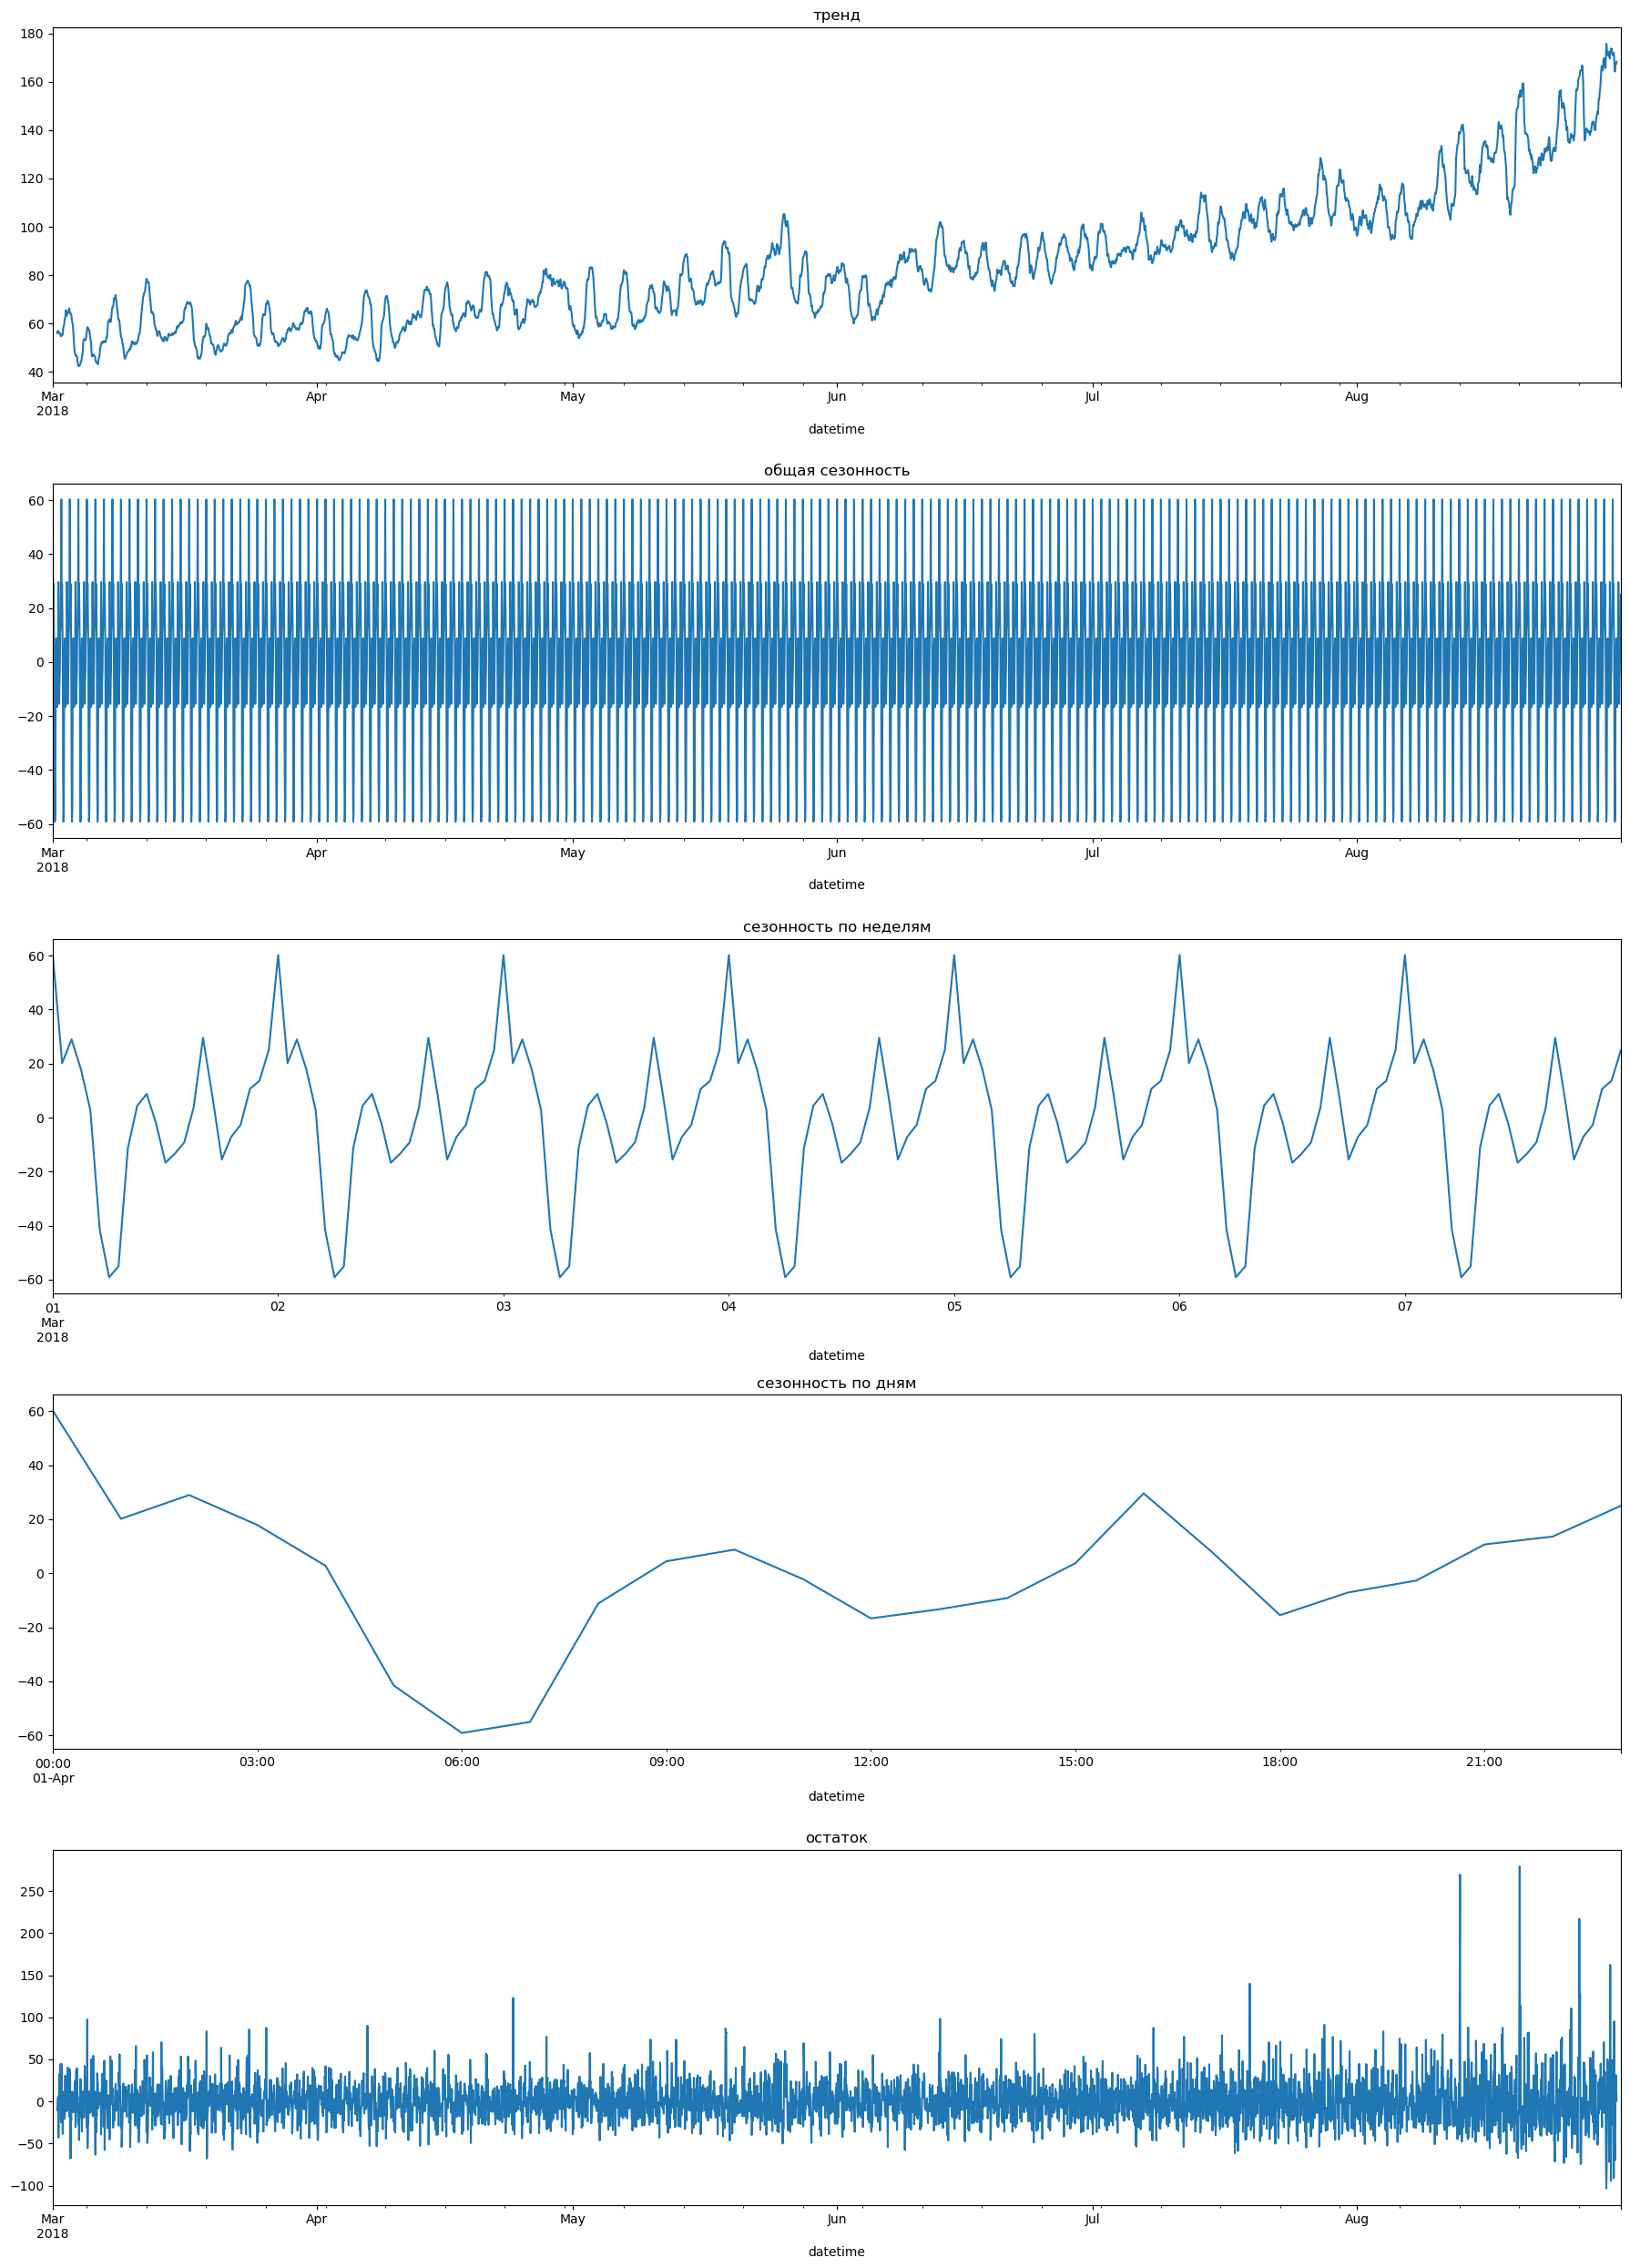

In [7]:
decomposed = seasonal_decompose(data)
plt.show()
plt.figure(figsize=(18,25))
plt.subplot(511)
decomposed.trend.plot(ax=plt.gca())
plt.title('тренд')
plt.subplot(512)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('общая сезонность')
plt.subplot(513)
decomposed.seasonal['2018-03-01':'2018-03-7'].plot(ax=plt.gca())
plt.title('сезонность по неделям')
plt.subplot(514)
decomposed.seasonal['2018-04-01 00:00:00':'2018-04-1 23:00:00'].plot(ax=plt.gca())
plt.title('сезонность по дням')
plt.subplot(515)
decomposed.resid.plot(ax=plt.gca())
plt.title('остаток')
plt.tight_layout()

### вывод

Видим наличие трендов и сезонностей. Также можно заметить, что заказы от дня недели не зависят, но зависят от времени: пик приходится на 12 ночи (видимо, перед закрытием метро) и минимум в 6 утра (метро открылось...)

## Обучение

### Подготовка признаков

In [8]:
# Напишем функцию для создания признаков

def make_features(data, max_lag, rolling_mean_size):
    
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


In [24]:
make_features(data, 24, 1)

In [25]:
# Разделим на выборки

train_valid, test = train_test_split(data, shuffle=False, test_size=0.1)
train_valid = train_valid.dropna()

train, valid = train_test_split(train_valid, shuffle=False, test_size=0.1)

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_valid = valid.drop(['num_orders'], axis=1)
target_valid = valid['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

### Создание и обучение моделей

#### Линейная регрессия

In [11]:
%%time
lr_model = LinearRegression()


lr_model.fit(features_train,target_train)

prediction = lr_model.predict(features_valid)

mse = mean_squared_error(target_valid, prediction)
rmse = mse**0.5
print(rmse )

34.103467692464676
CPU times: user 44.7 ms, sys: 62.6 ms, total: 107 ms
Wall time: 77.7 ms


#### LGBMRegressor

In [12]:
%%time
best_rmse = 1e10
best_depth = 0
best_estimators = 0

for n_estimator  in range(10,500,10):
    
    for depth in range(1,5):
        
        lgbm_model  = LGBMRegressor(
            max_depth = depth,
            learning_rate=0.1,
            n_estimators=n_estimator,
            subsample = 0.5)
           

        lgbm_model.fit(features_train,target_train)

        prediction = lgbm_model.predict(features_valid)
        
        mse = mean_squared_error(target_valid, prediction)
        rmse = mse**0.5
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_depth = depth
            best_estimators = n_estimator
            
print('\nЛучшая глубина:',best_depth,
      '\nЛучшее кол-во деревьев:',best_estimators,
      '\nЛучший результат',best_rmse )


Лучшая глубина: 4 
Лучшее кол-во деревьев: 170 
Лучший результат 32.193674900608364
CPU times: user 6min 25s, sys: 7.3 s, total: 6min 32s
Wall time: 6min 36s


#### Случайный лес

In [13]:
%%time
best_rmse = 1e10
best_depth = 0
best_estimators = 0

for n_estimator  in range(10,500,10):
    
    for depth in range(1,5):
        
        rf_model = RandomForestRegressor(
            n_estimators=n_estimator, 
            max_depth=depth, 
            random_state=42)
        

        rf_model.fit(features_train,target_train)

        prediction = rf_model.predict(features_valid)

        mse = mean_squared_error(target_valid, prediction)
        rmse = mse**0.5
        
        if rmse < best_rmse:
                best_rmse = rmse
                best_depth = depth
                best_estimators = n_estimator

print('\nЛучшая глубина:',best_depth,
      '\nЛучшее кол-во деревьев:',best_estimators,
      '\nЛучший результат',best_rmse )


Лучшая глубина: 4 
Лучшее кол-во деревьев: 80 
Лучший результат 39.12459964707906
CPU times: user 6min 50s, sys: 1.14 s, total: 6min 52s
Wall time: 6min 52s


#### Вывод

Мы создали и обучили 3 модели: Линейная регрессия, LGBMRegressor и Случайный лес. Проверили их работу на обучающей и валидационной выборках.
Результаты следующие:

- Линейная регрессия - 34,2
- LGBMRegressor - 32,2
- Случайный лес - 43.7

Как видим, лучшей оказалась LGBMRegressor. ЕЕ и будем тестировать


## Тестирование

In [26]:
%%time

lgbm_model  = LGBMRegressor(
            max_depth = 4,
            learning_rate=0.1,
            n_estimators=170,
            subsample = 0.1)
         
        
lgbm_model.fit(features_train,target_train)

prediction = lgbm_model.predict(features_test)

mse = mean_squared_error(target_test, prediction)
rmse = mse**0.5

print(rmse )

47.74011371215248
CPU times: user 680 ms, sys: 11.7 ms, total: 692 ms
Wall time: 703 ms


#### Вывод

На тестовой выборке модель также показала необходимый результат

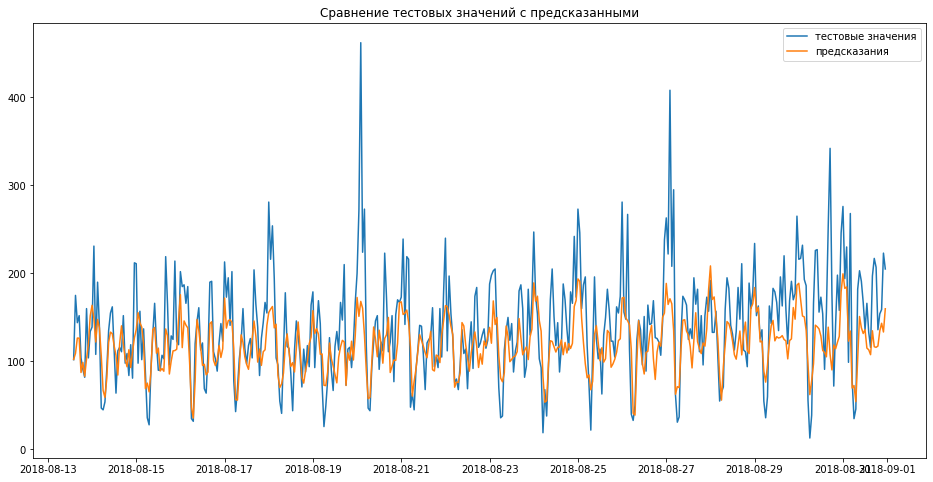

In [20]:
plt.figure(figsize=(16, 8))

plt.plot(target_test, label='тестовые значения')
plt.plot(target_test.index, prediction, label='предсказания')

plt.title('Сравнение тестовых значений с предсказанными')
plt.legend()
plt.show()

## Итог

По ходу проекта были выполнены следующие шаги:

Изучение и предобработка данных:

- загрузили и вывели информацию по таблице
- Проанализировали данные
- создали необходимые признаки

Создание и обучение моделей:

- Создали три модели и обучили на тренировочной выборке

- Проверили работу моделей на валидационной выборке

- Оценили модели и выбрали самую реультативную Анализ модели:

Протестировали модель на тестовой выборке

По итогу проекта лучшей оказалась LGBMRegressor: она хорошо показала себя на валидации,сразу выдав необходимый минимум RMSE. Хорошо себя показала на тесте, повторив результат и выполнив условия поставленной задачи

